In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"


# Compare the following drugs
drug_list=['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
markers=['o','x','d','^']
colors=['green','red','black','blue']

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data_pd = pd.read_csv(mouse_drug_data_to_load)

clinical_trial_data_pd = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
combined_df = pd.merge(mouse_drug_data_pd,clinical_trial_data_pd, on="Mouse ID", how="outer")

# Display the data table for preview

combined_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped=combined_df.groupby(["Drug", "Timepoint"])
mean_value=grouped["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
mean_value_df=pd.DataFrame(mean_value)
mean_value_df=mean_value_df.reset_index()

# Preview DataFrame
mean_value_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stem_tumor_volume=grouped['Tumor Volume (mm3)'].sem()

#print(stem_tumor_volume)
# Convert to DataFrame
stem_tumor_volume_df=stem_tumor_volume.reset_index()
# Preview DataFrame
stem_tumor_volume_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
pv_mean_value_df = mean_value_df.pivot(index = "Timepoint", columns = "Drug",values = "Tumor Volume (mm3)")
pv_stem_tumor_volume_df = stem_tumor_volume_df.pivot(index = "Timepoint", columns = "Drug",values = "Tumor Volume (mm3)")

# Preview that Reformatting worked
pv_mean_value_df.head()
pv_stem_tumor_volume_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


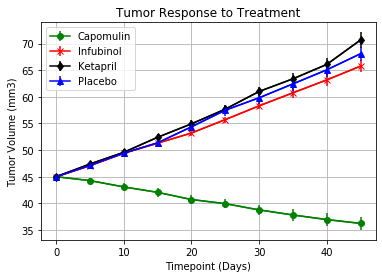

In [6]:

# Generate the Plot (with Error Bars)
fig, ax=plt.subplots()
mtv_df=pv_mean_value_df
stem_df=pv_stem_tumor_volume_df

mtv_timepoint=mtv_df.index

i=0
for drug in drug_list:
    ax.errorbar(mtv_timepoint, mtv_df[drug], yerr=stem_df[drug], marker=markers[i], color=colors[i], label = drug)
    i+=1
    
plt.legend(loc="best")

i=0
for drug in drug_list:
    plt.plot(mtv_timepoint, mtv_df[drug], color=colors[i])
    i+=1

plt.title("Tumor Response to Treatment")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()

# Save the Figure
plt.savefig('Tumor_Response_to_Treatment.png', dpi=300, format='png', bbox_inches='tight')
plt.show()




In [7]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
grouped_meta= combined_df.groupby(["Drug", "Timepoint"])
mean_meta=grouped_meta["Metastatic Sites"].mean()
# Convert to DataFrame
mean_meta_df=pd.DataFrame(mean_meta)
# Preview DataFrame
mean_meta_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
stem_meta = grouped_meta["Metastatic Sites"].sem()

# Convert to DataFrame
stem_meta_df=pd.DataFrame(stem_meta)

# Preview DataFrame
stem_meta_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [16]:
# Minor Data Munging to Re-Format the Data Frames
mean_meta_df = mean_meta_df.reset_index()
pv_mean_meta_df = mean_meta_df.pivot(index = "Timepoint", columns = "Drug",values = "Metastatic Sites")

stem_meta = stem_meta.reset_index()
pv_stem_meta_df = stem_meta_df.pivot(index = "Timepoint", columns = "Drug",values = "Metastatic Sites")

# Preview that Reformatting worked
pv_mean_meta_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


<function matplotlib.pyplot.show(*args, **kw)>

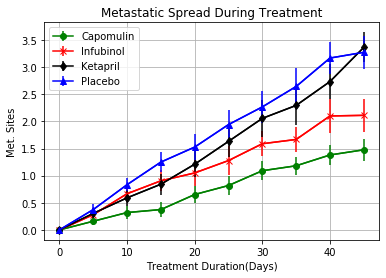

In [32]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
meta_m_df = pv_mean_meta_df
stem_m_df = pv_stem_meta_df
meta_timepoint = meta_m_df.index

i = 0
for drug in drug_list:
    ax.errorbar(meta_timepoint,meta_m_df[drug], yerr = stem_m_df[drug], marker=markers[i], color=colors[i],label = drug)
    i+=1
plt.legend(loc="best")

i = 0
for drug in drug_list:
    plt.plot(meta_timepoint, meta_m_df[drug], color=colors[i])
    i+=1
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration(Days)")
plt.ylabel("Met. Sites")
plt.grid()

# Save the Figure
plt.savefig("Metastatic_Spread_During_Treatment.png", dpi=300, format='png', bbox_inches='tight')
# Show the Figure
plt.show

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [30]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count=combined_df.groupby(["Drug", "Timepoint"])
count_value=grouped["Mouse ID"].count()

# Convert to DataFrame
count_value_df=pd.DataFrame(count_value)
count_value_df=count_value_df.reset_index()
count_value_r_df=count_value_df.rename(columns={"Mouse ID": "Mouse Count"})

# Preview DataFrame
count_value_r_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [38]:
# Minor Data Munging to Re-Format the Data Frames
pv_count_value_r_df = count_value_r_df.pivot(index = "Timepoint", columns = "Drug",values = "Mouse Count")
# Preview the Data Frame
pv_count_value_r_df.head()
#print(pv_count_value_r_df["Capomulin"])
#print(100 *pv_count_value_r_df["Capomulin"] / 25)


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


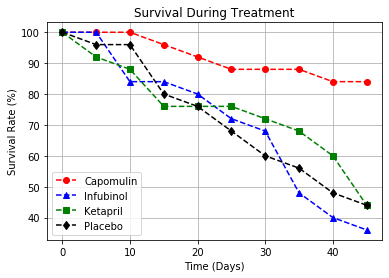

In [49]:
count_timepoint = pv_count_value_r_df.index
count_m_df = pv_count_value_r_df

# Generate the Plot (Accounting for percentages)
plot1, = plt.plot(count_timepoint, 100 * count_m_df["Capomulin"] / 25, "ro", linestyle="dashed", label = "Capomulin")
plot2, = plt.plot(count_timepoint, 100 * count_m_df["Infubinol"] / 25, "b^", linestyle="dashed", label = "Infubinol")
plot3, = plt.plot(count_timepoint, 100 * count_m_df["Ketapril"] / 25, "gs", linestyle="dashed", label = "Ketapril")
plot4, = plt.plot(count_timepoint, 100 * count_m_df["Placebo"] / 25 , "kd", linestyle="dashed", label = "Placebo")

plt.legend(loc="best")

#plt.legend(loc="best", fontsize="small", fancybox=True)

plt.title("Survival During Treatment") 
plt.ylabel("Survival Rate (%)") 
plt.xlabel("Time (Days)") 
plt.grid()


# Save the Figure
plt.savefig("Survival_During_Treatment.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [53]:
# Calculate the percent changes for each drug
drug_pct_change =  100 * (pv_mean_value_df.iloc[-1] - pv_mean_value_df.iloc[0]) / pv_mean_value_df.iloc[0]
drug_pct_change_sem =  100 * (pv_stem_tumor_volume_df.iloc[-1] - pv_stem_tumor_volume_df.iloc[0]) / pv_stem_tumor_volume_df.iloc[0]
# Display the data to confirm
drug_pct_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

(-19.475302667894173, 46.12347172785188, 57.028794686606076, 51.29796048315153)
<function labelpos at 0x0000025FEA2C62F0>


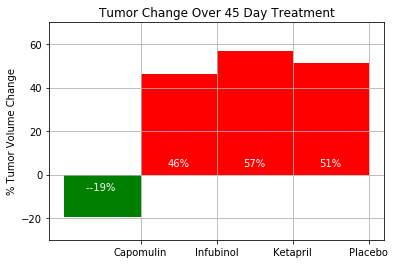

In [72]:
# Store all Relevant Percent Changes into a Tuple
pct_changes = (drug_pct_change["Capomulin"], 
               drug_pct_change["Infubinol"], 
               drug_pct_change["Ketapril"], 
               drug_pct_change["Placebo"])
# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
index = np.arange(len(pct_changes))  
width = 1
pos_change = ax.bar(index[0], pct_changes[0], width, color='green')
neg_change = ax.bar(index[1:], pct_changes[1:], width, color='red')

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid()

# Use functions to label the percentages of changes
def labelneg(changes):
    for change in changes:
        height = change.get_height()
        ax.text(change.get_x() + change.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def labelpos(changes):
    for change in changes:
        height = change.get_height()
        ax.text(change.get_x() + change.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")

# Call functions to implement the function calls
labelpos(pos_change)
labelneg(neg_change)

# Save the Figure
fig.savefig("Tumor_Change.png")

# Show the Figure
fig.show()

print(pct_changes)


![Metastatic Spread During Treatment](../Images/change.png)